In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft,irfft
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
realdata=np.fromfile("200ms/200ms_500MHz.bin",'u2',count=10000000)

In [3]:
N=len(realdata)
dt=1/2.7e9

In [4]:
onepointzeroGHz=np.fromfile("../../Signals/Strong/1.0GHz_strong_5.0dBm.bin",'u2')
onepointoneGHz=np.fromfile("../../Signals/Strong/1.1GHz_strong_5.0dBm.bin",'u2')
onepointtwoGHz=np.fromfile("../../Signals/Strong/1.2GHz_strong_5.0dBm.bin",'u2')
onepointthreeGHz=np.fromfile("../../Signals/Strong/1.3GHz_strong_5.0dBm.bin",'u2')
onepointthreefiveGHz=np.fromfile("../../Signals/Strong/1.35GHz_strong_5.0dBm.bin",'u2')
onepointfourGHz=np.fromfile("../../Signals/Strong/1.4GHz_strong_5.0dBm.bin",'u2')
onepointsixGHz=np.fromfile("../../Signals/Strong/1.6GHz_strong_5.0dBm.bin",'u2')
onehundMHz=np.fromfile("../../Signals/Strong/100MHz_strong_5.0dBm.bin",'u2')
fivehundMHz=np.fromfile("../../Signals/Strong/500MHz_strong_5.0dBm.bin",'u2')

In [5]:
onepointzero=fft.rfft(onepointzeroGHz)
onepointone=fft.rfft(onepointoneGHz)
onepointtwo=fft.rfft(onepointtwoGHz)
onepointthree=fft.rfft(onepointthreeGHz)
onepointthreefive=fft.rfft(onepointthreefiveGHz)
onepointfour=fft.rfft(onepointfourGHz)
onepointsix=fft.rfft(onepointsixGHz)
onehund=fft.rfft(onehundMHz)
fivehund=fft.rfft(fivehundMHz)

In [6]:
fderr=fft.rfft(realdata)

In [7]:
def plotlocal(fd,dt,nu1,nu2):
    dnu=1.0/((1/dt)*len(realdata))
    i1=int(nu1/dnu)
    i2=int(nu2/dnu)
    far=arange(i1,i2)*dnu
    fdz=fd[i1:i2]
    fdz=abs(fdz*fdz)
    return far,fdz

In [8]:
far,fdz=plotlocal(fderr, 2.7e9, 500.6e6, 500.8e6)

In [9]:
nuX=500.69158364e6
nuM=far[fdz.argmax()]
dnu=1/(N*dt)
print (nuM/1e6, "+/-", dnu/1e6)
print ("ratio",nuM/nuX-1)

500.69259 +/- 0.00027
ratio 2.00993991695e-06


In [118]:
def call_strong(name, nuX, dt):
    nu1= 90.6e6
    nu2=1700.6e6
    output = np.fromfile("../../Signals/Strong/" + name + "_strong_5.0dBm.bin", 'u2')
    fd=fft.rfft(output)
    dnu=1.0/((1/dt)*len(output))  #length of data changed (m&N), only difference between plotlocal and plotlocal1 
    i1=int(nu1/dnu)
    i2=int(nu2/dnu)
    far=arange(i1,i2)*dnu
    fdz=fd[i1:i2]
    fdz=abs(fdz*fdz)
    #return far,fdz,dnu
    nuM=far[fdz.argmax()]
    return (nuM/1e6, "+/-", dnu/1e6), (nuM/nuX-1), dnu/1e6

In [121]:
a,b,aa= call_strong('100MHz', 100.0e6, 2.7e9)
print(a)
print(b)
print(aa)

(99.98931884765625, '+/-', 0.04119873046875)
-0.000106811523438
0.04119873046875


In [122]:
c,d,cc=call_strong('500MHz', 500.0e6, 2.7e9)
print(c)
print(d)

(499.98779296875, '+/-', 0.04119873046875)
-2.44140625e-05


In [123]:
e,f,ee=call_strong('1.0GHz', 1000.0e6, 2.7e9)
print(e)
print(f)

(1000.0167846679688, '+/-', 0.04119873046875)
1.67846679688e-05


In [124]:
g,h,gg=call_strong('1.1GHz', 1100.0e6, 2.7e9)
print(g)
print(h)

(1100.006103515625, '+/-', 0.04119873046875)
5.54865056812e-06


In [125]:
i,j,ii=call_strong('1.2GHz', 1200.0e6, 2.7e9)
print(i)
print(j)

(1199.9954223632813, '+/-', 0.04119873046875)
-3.81469726563e-06


In [126]:
k,l,kk=call_strong('1.3GHz', 1300.0e6, 2.7e9)
print(k)
print(l)

(1300.0259399414063, '+/-', 0.04119873046875)
1.99538010817e-05


In [127]:
m,n,mm=call_strong('1.35GHz',1350.0e6, 2.711e9)
print(m)
print(n)

(1355.5, '+/-', 0.0413665771484375)
0.00407407407407


In [128]:
o,p,oo=call_strong('1.4GHz', 1400.0e6, 2.9e9)
print(o)
print(p)

(1396.2799072265625, '+/-', 0.04425048828125)
-0.00265720912388


In [129]:
q,r,qq=call_strong('1.6GHz', 1600.0e6, 3.928e9)
print(q)
print(r)

(1600.30517578125, '+/-', 0.0599365234375)
0.000190734863281


In [130]:
ratios=(b,d,f,h,j,l,n,p,r)

In [131]:
print(ratios)

(-0.0001068115234375, -2.4414062499977796e-05, 1.6784667968838818e-05, 5.5486505681212606e-06, -3.814697265625e-06, 1.9953801081662448e-05, 0.0040740740740741188, -0.0026572091238838969, 0.00019073486328125)


In [138]:
freqs=(100, 500, 1000, 1100, 1200, 1300, 1350, 1400, 1600)
err=(aa,cc,ee,gg,ii,kk,mm,oo,qq,)

<Container object of 3 artists>

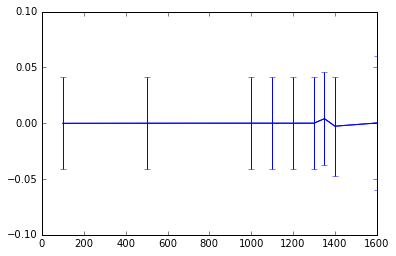

In [142]:
plt.plot(freqs, ratio)
plt.ylim(-0.1, 0.1)
errorbar(freqs,ratio,fmt='b-',yerr=err)